 # PSY 763 week 3
 
This week we will:

1. Get more familiar with how to generate and index into arrays in python
1. Learn how matrix multiplications work in python
1. Generate data based on multiple categorical predictors
1. Fit $\beta$ weights for the categorical predictors in an ordinary least squares regression

HOLY COW that's a lot - let's get going!

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# A few config options
plt.rcParams['image.aspect'] = 'auto'
plt.rcParams['image.interpolation'] = 'nearest'

## Basic python concepts we will use this week:

1. Lists
1. Arrays
1. Definition of arrays using: `np.array()`, `np.zeros()`, `np.ones()`, `np.random.rand()`, `np.random.randn()`
1. Calling array methods
1. For loops

### 1. Lists

In [2]:
# This is a list. It has four elements. 
a = [1, 2, 6, 9]
# display the list:
print(a)

[1, 2, 6, 9]


A list is a general python structure, and can be used in many contexts. A list can hold strings, numbers, other lists - (nearly) anything you want. For example, a list can hold users of a website:

```python
users = ['bsmith', 'jdoe', 'sramonycajal']
```

This means it's a bad idea to try to do math on a list. Multiplication expands the number of items in a list:

In [3]:
# This repeats the list 3 times rather than multiplying the elements by 3
test_list = [1, 9, 3]
print(test_list * 3)

[1, 9, 3, 1, 9, 3, 1, 9, 3]


In [4]:
# Lists can be used for loops. Arrays, or any other iterable variable type, can also be used -
# just not scalars (individual numbers)
test_list = [3, 7, 9]
for t in test_list:
    print('next list element is', t)

next list element is 3
next list element is 7
next list element is 9


In [5]:
# This fails; the scalar number 3 is not *iterable*
for wtf in 3:
    print(wtf)

TypeError: 'int' object is not iterable

### 2. Arrays
Arrays are the main type of variable you will use in numpy, and are designed for doing math. 

In [6]:
# The simplest way to define an array is to make a list of the values you want in it.
# the input to np.array is a list:
a_list = [1, 2, 3]
a = np.array(a_list)
# ... but you can condense these two steps to one, thus:
b = np.array([4, 5, 6])
# When printed, these look like lists...
print(a)
print(b)
# ... but they're not!

[1 2 3]
[4 5 6]


In [7]:
# arrays can be multiplied by scalars (constants)
print('a * 3 =')
print(a * 3)
# Elementwise multiplication
print('a * b = ')
print(a * b)

a * 3 =
[3 6 9]
a * b = 
[ 4 10 18]


In [8]:
# Arrays can be 2D as well. Notice that the input to np.array() here is a list of lists
c = np.array([[1,2,3],[4,5,6]])
print(c)

[[1 2 3]
 [4 5 6]]


In [9]:
# You can get the shape of an array using:
print('shape of c is :', np.shape(c))
# This is just like matlab's `size()` function

shape of c is : (2, 3)


In [10]:
# You can also get the shape of an array by accessing the shape *property* of the array:
print('shape of c is: ', c.shape)

shape of c is:  (2, 3)


Arrays (and lists!) have both *properties* and *methods* associated with them. These can be accessed with "." syntax (`<variable_name>.<property>` or `<variable_name>.<method()>)`), for example:

```python
c.shape # shape is a property
c.T # .T is a method (a shortcut for c.transpose()
```

*properties* are constants or values associated with an object

*methods* are functions that operate on an object (potentially with other inputs)

In [11]:
print("plain ol' c:")
print(c)
print('')
print('c, transposed:')
print(c.T)

plain ol' c:
[[1 2 3]
 [4 5 6]]

c, transposed:
[[1 4]
 [2 5]
 [3 6]]


### 3. Generation of arrays
Often, you don't want to define an array by hand (i.e., by typing out the values that should constitute each cell in the array). Instead, you want, for example, to initialize an array to a bunch of zeros, or a bunch of ones, or random numbers, in some particular shape. This is what the following commands are for: 

```python
np.zeros() # All zeros
np.ones() # All ones
np.linspace() # evenly (linearly) spaced values between some min and max
np.arange() # "array-range" - a range of numbers between some minimum and some maximum, with a step size specified
np.random.rand() # Numbers evenly distributed between 0 and 1
np.random.randn() # Random numbers from a standard normal distribution (mean 0, standard deviation 1)
np.random.randint() # Random INTEGERS
```

As always, see the HELP for each of these functions for details about what kind of values are used as arguments to the functions!

e.g.:
```python
# Get help! What do inputs mean??
np.ones? 
```

In [12]:
# examples
all_ones = np.ones((4,3))
print(all_ones)

print('')

random_uniform = np.random.rand(4,3)
print(random_uniform)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

[[0.2968277  0.12862968 0.44344073]
 [0.43717238 0.40946211 0.90640218]
 [0.67958587 0.50768419 0.90484704]
 [0.18290909 0.92557078 0.71373474]]


### Array indexing
To select values from an array, you use brackets (`[]`)

In [13]:
# Define a vector X
X = np.array([2, 4, 5, 8, 3, 1, 9])
print(X[3])

8


Remember, python uses zero-based indexing, so the first value in the array is index 0, the second is 1, etc! THIS IS NEARLY GUARANTEED TO MIX YOU UP IF YOU COME FROM MATLAB. But it's useful! and good for you! and you will see why as we go.

You can select ranges of values from an array using slightly different syntax. For example, to select the 2nd, 3rd, and 4th values in a vector array `X`, you would do the following:

In [14]:
print(X)
print(X[1:4])

[2 4 5 8 3 1 9]
[4 5 8]


In [15]:
# For the last n values:
print(X)
print(X[-3:])

[2 4 5 8 3 1 9]
[3 1 9]


In [16]:
# For the first n values:
print(X)
print(X[:3])

[2 4 5 8 3 1 9]
[2 4 5]


In [17]:
# For every other value:
print(X)
print(X[::2])

[2 4 5 8 3 1 9]
[2 5 3 9]


Note that for all of the above, the pattern is [start_index:end_index:step]. Any of these left blank are assumed to be the beginning of the array, the end of the array, and 1, respectively. 

Now, you try it! 

# Exercises

In [18]:
# Print every other value, starting with the SECOND value in the array (i.e. starting with the 4)
print(X)
print(X[1::2]) 

[2 4 5 8 3 1 9]
[4 8 1]


Note: This is a useful trick that gets used fairly often!

In [19]:
# Print all the values in X in reverse order
print(X[::-1]) 

[9 1 3 8 5 4 2]


You can index multi-dimensional arrays the same way, with one value per 

In [20]:
# Create a 2D array of shape (10,4), print the array, and then print all values in the 2nd (index=2) column
print("X:")
X_2d = np.random.randn(10,4)
print(X_2d)
# (the \n is a formatting command that leaves an extra line!)
print("\nJust the values in 2nd column, as a 1D vector")
print(X_2d[:,2])
# Note: to maintain shape of one column as a column vector:
print("\nX[:,2] as a column vector, option 1:")
print(X_2d[:,2:3])
print("\nX[:,2] as a column vector, option 2a:")
tmp = X_2d[:,2]
print(tmp[:, np.newaxis])
# Or you can combine these steps into one line:
print("\nX[:,2] as a column vector, option 2b:")
print(X_2d[:,2][:, np.newaxis])

X:
[[ 1.68512465 -1.13445335  0.44397117 -0.37705052]
 [ 0.59010567 -0.30271903  1.2509142   1.45996881]
 [-0.30613013  0.2170322   0.25143781  0.51630346]
 [-0.04330619 -0.63803951 -0.26828177  0.46955239]
 [-0.07141482 -2.62265257  0.93818396  0.77425675]
 [-0.16532867  0.26327744  0.72661561 -0.70892675]
 [-0.4719526  -1.94903585 -0.5044447   0.32120144]
 [ 0.14853922  1.61078189 -0.74715821 -1.76224918]
 [ 2.06782255  0.41371429 -0.74694751  2.18918923]
 [ 0.49957377  0.10793237  0.5640172   0.66873691]]

Just the values in 2nd column, as a 1D vector
[ 0.44397117  1.2509142   0.25143781 -0.26828177  0.93818396  0.72661561
 -0.5044447  -0.74715821 -0.74694751  0.5640172 ]

X[:,2] as a column vector, option 1:
[[ 0.44397117]
 [ 1.2509142 ]
 [ 0.25143781]
 [-0.26828177]
 [ 0.93818396]
 [ 0.72661561]
 [-0.5044447 ]
 [-0.74715821]
 [-0.74694751]
 [ 0.5640172 ]]

X[:,2] as a column vector, option 2a:
[[ 0.44397117]
 [ 1.2509142 ]
 [ 0.25143781]
 [-0.26828177]
 [ 0.93818396]
 [ 0.72661561

In [21]:
# What is the difference between the following two lines?
A = X_2d[:4, 0]
B = X_2d[:4, :1]
# (see what A and B are. Why would this difference be useful?)

The difference is dimensionality. For the line: 

```python
A = X_2d[:4, 0]
```
... the resulting output is 1D 

for the line:
```python
B = X_2d[:4, :1]
```

... the second dimension is maintained. Both are vectors, but one vector has a second dimension to it - its shape is (4, 1) instead of just (4,) (with no second dimension at all). 

Make a design matrix! Last week, we created a single predictor of ones and zeros. Now, create a 2D array, in which each column is a predictor. 

Useful functions to combine arrays are: 

```python
np.hstack()
np.vstack()
np.concatenate()
```

Look up the help for these functions to see what they do!
```python
np.hstack?
```

In [22]:
# Function to define indicator variable that we used last week: 
def define_indicator(n_timepoints, onsets, duration):
    """Defines an indicator variable given onsets and constant durations
    
    Parameters
    ----------
    n_timepoints : scalar, int
        number of timepoints in timecourse of predictor
    onsets : array-like 
        list or array of indices for onsets of conditions
    duration : scalar
        number of indices in timecourse for which conditions are "on"
    """
    x = np.zeros(n_timepoints)
    for on in onsets:
        # Note that this was changed to += 1 instead of = 1 - what does that do??
        x[on:on+duration] += 1
    return x

In [23]:
# Create a design matrix!
# Define variables
n_timepoints = 100
onsets = [[10, 30, 38, 58, 82],
          [18, 47, 68, 75, 90]]
duration = 6

iv1 = define_indicator(n_timepoints, onsets[0], duration)
iv2 = define_indicator(n_timepoints, onsets[1], duration)
X = np.hstack([iv1[:, np.newaxis], iv2[:, np.newaxis]])

(100, 2)


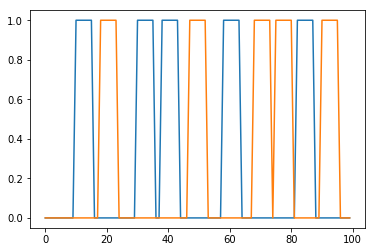

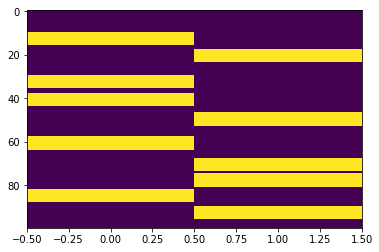

In [24]:
# Show design matrix!
print(X.shape)
plt.figure();
plt.plot(X);
plt.figure();
# The extra keyword arguments here (aspect and interpolation) change defaults for imshow
# Those defaults can be changed at the notebook level,too, with e.g. plt.rcParams['image.aspect'] = 'auto'
plt.imshow(X, aspect='auto', interpolation='nearest');

# Simple matrix multiplications
Matrix multiplication is NOT the default for arrays (as it is in matlab). So if `A` and `B` are arrays, multiplying them with `*` will get you the *element-wise product*:

In [25]:
A = np.random.randint(0, 4, size=(4,3))
B = np.random.randint(0, 4, size=(4,3))
print('A')
print(A)
print('B')
print(B)
print('Element-wise product:')
print(A*B)

A
[[1 3 3]
 [2 3 2]
 [2 1 0]
 [0 1 2]]
B
[[3 3 3]
 [3 2 2]
 [0 0 2]
 [0 3 0]]
Element-wise product:
[[3 9 9]
 [6 6 4]
 [0 0 0]
 [0 3 0]]


Note that there's a lot more complexity here in python - it's possible to multiply arrays of different sizes by "broadcasting", like this: 

In [26]:
A = np.random.randint(0, 4, size=(1,3))
B = np.random.randint(0, 4, size=(4,3))
print('A')
print(A)
print('B')
print(B)
print('Element-wise product:')
print(A*B)

A
[[2 0 3]]
B
[[2 2 2]
 [0 0 0]
 [2 2 1]
 [0 3 0]]
Element-wise product:
[[4 0 6]
 [0 0 0]
 [4 0 3]
 [0 0 0]]


... but the rows / columns have to match up - you have to be able to turn one array into the other array by simply replicating it a bunch of times in one dimension (no transpositions!)

In [27]:
# This will fail, because an array of size (3,1) cannot be tiled out to size (4,3)
A = np.random.randint(0, 4, size=(3,1))
B = np.random.randint(0, 4, size=(4,3))
print('A')
print(A)
print('B')
print(B)
print('Element-wise product:')
print(B*A)

A
[[3]
 [0]
 [0]]
B
[[1 2 1]
 [0 1 0]
 [0 1 3]
 [2 2 3]]
Element-wise product:


ValueError: operands could not be broadcast together with shapes (4,3) (3,1) 

# BREAK FOR LOTS OF CHALKBOARD TALK

Matrix multiplications are done using `np.dot()`, or,  equivalently, the .dot() method of arrays. 

The following is a python instantiation of the formula: 

# $A^TB$

In [28]:
# re-define A and B
A = np.random.randint(0, 4, size=(4,3))
B = np.random.randint(0, 4, size=(4,3))
ATB = A.T.dot(B)
print(A)
print('')
print(B)
print('')
print(ATB)

[[0 3 2]
 [2 3 0]
 [3 0 3]
 [2 1 1]]

[[1 3 1]
 [3 3 2]
 [1 3 2]
 [1 3 2]]

[[11 21 14]
 [13 21 11]
 [ 6 18 10]]


Some convenient uses of matrix multiplication:

In [29]:
# Sum up the values of particular rows or columns of an array:
A = np.random.randint(0, 5, size=(5,2))
B = np.zeros((1,5))
B[:, 2:4] = 1
print('A')
print(A)
print('B')
print(B)
print('Select by index and sum:')
print(np.sum(A[2:4,:], axis=0))
print(('Sum by matrix multiplication:'))
print(B.dot(A))

A
[[4 4]
 [2 0]
 [1 2]
 [4 2]
 [2 3]]
B
[[0. 0. 1. 1. 0.]]
Select by index and sum:
[5 4]
Sum by matrix multiplication:
[[5. 4.]]


In [30]:
# Subtraction by matrix multiplication:
# Subtract the sum of rows 1, 2, and 3 from the sum of rows 4 and 5
A = np.random.randint(0, 5, size=(5,2))
B = np.hstack([-1 * np.ones((1,3)), np.ones((1,2))])
print('A')
print(A)
print('B')
print(B)
print('Select by index and sum:')
print(np.sum(A[3:], axis=0) - np.sum(A[:3,:], axis=0))
print(('Sum by matrix multiplication:'))
print(B.dot(A))

A
[[2 3]
 [1 1]
 [1 4]
 [1 0]
 [1 4]]
B
[[-1. -1. -1.  1.  1.]]
Select by index and sum:
[-2 -4]
Sum by matrix multiplication:
[[-2. -4.]]


NOTE: This is how we can compute T contrasts for many voxels at once! Which we will do, later.

Side note: what is the identity matrix?

In [31]:
I = np.eye(4)
print(I)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [32]:
A = np.random.randint(0, 10, size=(3,4)).astype(np.float)
print("A")
print(A)
print('A * I')
print(A.dot(I))

A
[[5. 8. 3. 2.]
 [2. 3. 3. 1.]
 [0. 3. 2. 3.]]
A * I
[[5. 8. 3. 2.]
 [2. 3. 3. 1.]
 [0. 3. 2. 3.]]


Side note: what does inversion do?

In [33]:
# Start with a random array
Q = np.random.randn(7,3)
print(Q.shape)
# Multiply the array by its transpose to make it a square array
qtq = Q.T.dot(Q)
print(qtq.shape)
# This gives
nearly_i = np.linalg.inv(qtq).dot(qtq)
print(nearly_i)

(7, 3)
(3, 3)
[[ 1.00000000e+00 -4.07462583e-17 -5.89505961e-17]
 [-1.38312509e-17  1.00000000e+00 -1.45769567e-17]
 [ 8.34990171e-18  6.65070979e-18  1.00000000e+00]]


Note that those `e-17` values mean (something) x $10^{-17}$, which is very close to zero!

# Generate data! 
Our model for fMRI data is that $Y = X\beta + \epsilon$, right? 

So, from the X you already have, specify some $\beta$ weights, some noise, and generate a Y!

Aside! the `*` syntax allows you to send multiple arguments into a function via a tuple or list. Here's an example:

In [34]:
def my_fun(a, b):
    """A dirt simple function to add two numbers"""
    return a + b

# Standard call
print(my_fun(1, 2))

# Call with fancy * syntax
my_inputs = (3, 4)
print(my_fun(*my_inputs))

# This works a little bit like varargin in matlab, if you are familiar with that. 
# If you are not familiar with varargin, never mind!

3
7


In [35]:
# Create Y
# (1) Define arbitrary B values
B = np.array([[3],[4]])
# (2) Multiply X by beta values
Y = X.dot(B)
# (3) Add noise!
E = np.random.randn(*Y.shape)
Y = Y + E

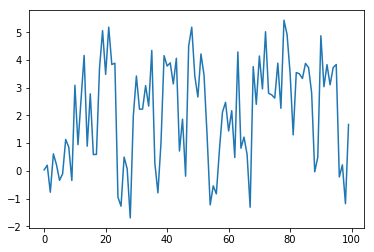

In [36]:
# Show the data you generated!
plt.plot(Y);

# Fit the data! 

The equation to estimate $\beta$ weights from data ($Y$) and a design matrix ($X$) is:

## $\beta = (X^TX)^{-1}X^TY$

So, let's do that in python! You already have X and Y, the only thing you need to know is how to invert a matrix. You can use: 

```python
np.linalg.inv()
```
to do this!

Not as complicated as it sounds, at this point! Give it a try!


In [37]:
# To put that formula into python:
B_est = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))

In [38]:
# This is NEARLY the values we specified (3,4)
B_est

array([[2.86307505],
       [3.82396749]])

# For the extra exercise:
i.e., for many Y values rather than 1: think about how, in python, you should compare the estimated beta values to the true beta values.

### Visualize what you have just modeled! 

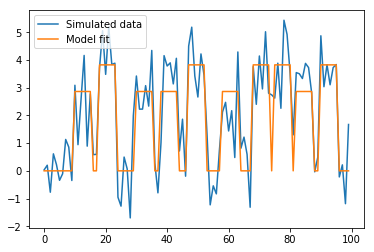

In [39]:
# This should give you back the signal you started with, minus the noise (which you can never estimate)
Y_est = X.dot(B_est)
plt.plot(Y, label='Simulated data')
plt.plot(Y_est, label='Model fit')
plt.legend();

# Useful exercises
Not homework, because not for credit, but useful...

> Generate a MANY Y values by specifying the SAME X, and more B values (the shape of B should be  (n_conditions x n_voxels) - bump up the value of n_voxels! The SAME MULTIPLICATION SHOULD WORK!

Hint: Start with only a few (say ~10) before you try moving up to 100, 1000, or more!

In [40]:
# Change B...
B2 = ... # FILL ME IN!
# Define noise
E2 = np.random.randn()
# Same multiplication
Y2 = X.dot(B2) + E2
# visualize Y (maybe as an image, instead of as a line plot (i.e. using imshow))
plt.imshow(Y2, aspect='auto', interpolation='nearest')

TypeError: unsupported operand type(s) for *: 'float' and 'ellipsis'

> Generate a new X by adding a column of ones to the left side of your original X. Generate a new, different set of beta values for this X. Add a few more columns of indicator variables, just for fun! Then generate betas and data in the same way as above.

In [41]:
# Same as above, but more so...
X = ...
B = ...
E = ...

> Create a design matrix with only two columns, and ENTIRELY RANDOM (Gaussian-distributed) $\beta$ weights for 100,000 voxels. That is, one beta weight should NOT be reliably larger than the other. Add noise, estimate your beta weights, and 

# Multiple comparisons demo
From here down is a demonstration of the multiple comparisons problem that we talked about in class. Don't worry if you don't understand all the code; look at the figures, try to absorb what the code is doing. 

In [42]:
# Create a design matrix 
n_timepoints = 100
onsets = [[10, 30, 38, 58, 82],
          [18, 47, 68, 75, 90]]
duration = 6
iv1 = define_indicator(n_timepoints, onsets[0], duration)
iv2 = define_indicator(n_timepoints, onsets[1], duration)
X = np.hstack([iv1[:, np.newaxis], iv2[:, np.newaxis]])

# Simulate voxel response
n_voxels = 100000
b_magnitude = 0 # NO real signal due to betas!
noise_magnitude = 3
# (true) Beta weights (all zeros, because b_magnitude is zero!)
B = np.ones((2, n_voxels)) * b_magnitude
# Noise
E = np.random.randn(n_timepoints, n_voxels) * noise_magnitude
Y = X.dot(B) + E
# Estimate beta
B_est = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))

# $t$ contrasts between $\beta$ values
The function in the next cell computes $t$ values for contrasts between $\beta$ weights from the regression. The formula for this type of $t$ statistic is: 

## $t = \frac{c^T \hat\beta}{\sqrt{\hat{\sigma}^2 c (X^T X)^+c^T}}$
    
where $\hat{\sigma}^2$ is the estimate of variance in the residuals: 
    
## $\hat{\sigma}^2 = \sum_{i=1}^n (\hat{y}_i - y_i)^2$

... $\hat{y}_i$ is a single time value of $\hat{Y}$, which is: 

## $\hat{Y} = X^T\hat{\beta}$

... and $(X^T X)^+$ is the Penrose pseudo-inverse of $X^T X$ (think of it as $(X^TX)^{-1}$).


In [50]:
from scipy import stats

def t2pval(t, dof, is_two_sided=False):
    """Convert t value to p value give degrees of freedom (dof)"""
    if is_two_sided:
        t = np.abs(t) # use |t| for two sided P-value
        p = 2 * (1 - stats.t.cdf(t, dof))
    else:
        p = 2 * (1 - stats.t.cdf(t, dof)) / 2 # divde by two for one-tailed test
    return p

def t_contrast(B, C, X, Y, is_two_sided_p=True):
    """Compute t contrast for a set of weights

    Only (?) appropriate for weights fit using OLS regression.

    Largely borrowed from M. Brett's course on practical fMRI, http://perrin.dynevor.org/glm_intro.html
    Parameters
    ----------
    B : array-like
        weight matrix, features x voxels
    C : array-like
        Contrast vector (often 1s, 0s, -1s), as long as total number of weights
    X : array-like 
        Stimulus matrix
    Y : array-like
        data that were originally fit

    Returns
    -------
    t : array-like
        t statistic

    Notes
    -----
    $t = \frac{c^T \hat\beta}{\sqrt{\hat{\sigma}^2 c (X^T X)^+c^T}}$
    
    where $\hat{\sigma}^2$ is the estimate of variance in the residuals: 
    
    $\hat{\sigma}^2 = \sum_{i=1}^n (\hat{y}_i - y_i)^2$
    $\hat{Y} = X^T\hat{\beta}$
    
    and $(X^T X)^+$ is the Penrose pseudo-inverse of $X^T X$ (think of it as $(X^TX)^{-1}$.

    This is all based on OLS estimation; we assume the errors to have independent
    and identical normal distributions around zero for each $i$ in $\epsilon_i$ (i.i.d).
    """
    # Make sure X, Y, C are all arrays
    B = np.asarray(B)
    X = np.asarray(X)
    C = np.atleast_2d(C)
    Y = np.asarray(Y)
    # The fitted values - this may be an expensive step, depending on how big B is
    Y_est = X.dot(B)
    # Residual sum of squares
    RSS   = ((Y - Y_est)**2).sum(axis=0)
    # Degrees for freedom is the number of observations n minus the number
    # of independent regressors we have used.  If all the regressor columns
    # in X are independent then the (matrix rank of X) == p,
    # where p the number of columns in X. If there is one column that can
    # expressed as a linear sum of the other columns then (matrix rank of X)
    # will be p - 1 - and so on.
    df =  X.shape[0] - np.linalg.matrix_rank(X)
    # Mean residual sum of squares
    MRSS  = RSS / df
    # Calculate bottom half of t statistic
    SE    = np.sqrt(MRSS * C.dot(np.linalg.pinv(X.T.dot(X)).dot(C.T)))
    t     = C.dot(B)/SE
    p = t2pval(t, df, is_two_sided=is_two_sided_p)
    return t, df, p

In [51]:
# Compute T contrast. 
t, df, p = t_contrast(B_est, [-1,1], X, Y)

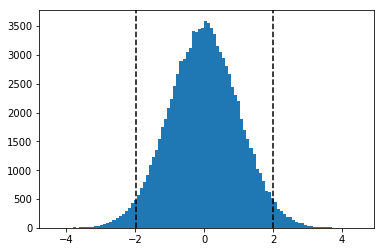

In [52]:
# Show the distribution of t values
p_thr = 0.05 # for funzies
plt.hist(t.flatten(), bins=100)
t_thr = np.min(np.abs(t[p < p_thr])) # select minimum absolute t value for p < 0.05
ylim = plt.ylim() # get Y limits
# Show where t values exceed threshold (where p < 0.05 in this distribution)
plt.vlines([-t_thr, t_thr], *ylim, linestyle='--')
plt.ylim(ylim);

In [53]:
# Suspiciously, the number of p values that are "significant" at < 0.05...
p_thr = 0.05
print(np.sum(p < p_thr))
# Matches very closely with 0.05 * the number of voxels we simulated!
print(p_thr * n_voxels)

5061
5000.0


This is why we need to adjust our p thresholds when computing multiple comparisons! 